# Wheat Leaves Disease Classification

Dataset credits: 
Dataset 1 : https://www.kaggle.com/datasets/olyadgetch/wheat-leaf-dataset
Dataset 2 : https://www.kaggle.com/datasets/sinadunk23/behzad-safari-jalal

### Import all the Dependencies

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
# from tensorflow.keras.metrics import Precision, Recall, Accuracy

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ../../wheat_leaf


In [4]:
IMAGE_SIZE = 256
CHANNELS = 3

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        brightness_range=[0.6,1.0],
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
)
train_generator = train_datagen.flow_from_directory(
        'Balanced Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        # save_to_dir="generated_images"
)

Found 4150 images belonging to 4 classes.


In [6]:
len(train_generator)

130

In [7]:
train_generator.class_indices

{'Brown_rust': 0, 'Healthy': 1, 'Septoria': 2, 'Yellow_rust': 3}

In [8]:
class_names = list(train_generator.class_indices.keys())
class_names

['Brown_rust', 'Healthy', 'Septoria', 'Yellow_rust']

In [9]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch.shape)
    break
#     count+=1
#     if count>2:
#         break

(32, 256, 256, 3)


In [10]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'Balanced Dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 517 images belonging to 4 classes.


In [11]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'Balanced Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 522 images belonging to 4 classes.


In [12]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.10980393 0.09556875 0.07472567]
  [0.08797178 0.06957684 0.04604742]
  [0.04874018 0.02829166 0.00833393]
  ...
  [0.1227666  0.08355091 0.07570777]
  [0.12402046 0.08480478 0.07696164]
  [0.12527433 0.08605865 0.07821551]]

 [[0.10980393 0.09640467 0.07597955]
  [0.09549499 0.07668208 0.05315266]
  [0.04539653 0.02661983 0.00540824]
  ...
  [0.12956348 0.08846287 0.08024274]
  [0.12538393 0.08219353 0.07355545]
  [0.12120437 0.0759242  0.06686816]]

 [[0.10980393 0.09724057 0.07723341]
  [0.10301818 0.08378732 0.06025791]
  [0.04205289 0.02494801 0.00248255]
  ...
  [0.0958909  0.03706737 0.02459336]
  [0.09798068 0.03915715 0.02584723]
  [0.10007046 0.04124692 0.0271011 ]]

 ...

 [[0.2537795  0.1847317  0.11771515]
  [0.26381043 0.19559856 0.12732813]
  [0.27384135 0.20646538 0.1369411 ]
  ...
  [0.24526517 0.1903632  0.14722595]
  [0.26440477 0.2095028  0.16636553]
  [0.26666668 0.21176472 0.16862746]]

 [[0.3175657  0.23464699 0.16405876]
  [0.32299912 0.23757267 0.16698444]


In [13]:
from keras.models import load_model
model = load_model('../models/4.0 - 4 classes - balanced dataset - data augmentation using image data generator class/model_v4.h5')

In [14]:
concatenated_array_x = test_generator[0][0]
concatenated_array_y = test_generator[0][1]

for i in range(1, len(test_generator)):
    concatenated_array_x = np.concatenate((concatenated_array_x, test_generator[i][0]))
    concatenated_array_y = np.concatenate((concatenated_array_y, test_generator[i][1]))


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(concatenated_array_x)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Get true labels from the test data
y_true = concatenated_array_y

# Calculate various metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)



17/17 [==============================] - 5s 264ms/step
Accuracy: 0.9885057471264368
Precision: 0.9886572181263651
Recall: 0.9885057471264368
F1 Score: 0.9884859640862829


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred,target_names=class_names))

              precision    recall  f1-score   support

  Brown_rust       0.97      0.99      0.98       114
     Healthy       0.99      1.00      1.00       151
    Septoria       1.00      1.00      1.00       120
 Yellow_rust       0.99      0.96      0.98       137

    accuracy                           0.99       522
   macro avg       0.99      0.99      0.99       522
weighted avg       0.99      0.99      0.99       522



In [41]:
y_pred

array([3, 2, 2, 1, 3, 2, 3, 0, 3, 2, 2, 2, 0, 2, 3, 0, 1, 2, 2, 2, 0, 3,
       1, 0, 2, 3, 2, 3, 1, 2, 1, 2, 0, 1, 3, 2, 0, 3, 3, 0, 1, 2, 2, 3,
       2, 2, 1, 2, 1, 0, 3, 0, 2, 2, 0, 1, 1, 2, 3, 0, 1, 2, 3, 2, 2, 1,
       1, 3, 0, 1, 3, 2, 1, 2, 3, 3, 0, 1, 1, 3, 3, 1, 3, 0, 0, 0, 0, 3,
       3, 2, 1, 3, 1, 3, 3, 0, 1, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 1, 3,
       3, 2, 1, 0, 1, 3, 1, 3, 0, 3, 2, 0, 2, 0, 1, 3, 3, 3, 1, 3, 3, 3,
       0, 3, 1, 1, 3, 0, 2, 1, 3, 3, 1, 3, 0, 1, 0, 1, 1, 0, 2, 1, 3, 3,
       1, 3, 0, 3, 1, 0, 3, 1, 3, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 3, 2,
       0, 1, 3, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2,
       1, 3, 1, 0, 1, 1, 3, 2, 1, 3, 3, 0, 3, 1, 1, 0, 0, 1, 0, 3, 0, 1,
       1, 0, 3, 1, 1, 0, 2, 2, 2, 1, 0, 0, 3, 3, 2, 1, 3, 2, 1, 1, 1, 0,
       3, 3, 2, 1, 3, 1, 3, 1, 2, 0, 2, 0, 1, 1, 3, 2, 1, 1, 1, 1, 3, 0,
       3, 1, 3, 2, 0, 0, 1, 3, 2, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 2, 3, 0,
       0, 2, 3, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2, 0,

In [43]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [20]:
scores

[0.04478054493665695, 0.9808428883552551]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [21]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [22]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 129}

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [24]:
type(history.history['loss'])

list

In [25]:
len(history.history['loss'])

50

In [26]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8942739367485046,
 0.46461597084999084,
 0.3586450517177582,
 0.2907954454421997,
 0.3149961531162262]

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [28]:
val_acc

[0.76953125,
 0.833984375,
 0.888671875,
 0.91015625,
 0.921875,
 0.916015625,
 0.923828125,
 0.921875,
 0.931640625,
 0.93359375,
 0.94921875,
 0.94140625,
 0.921875,
 0.958984375,
 0.958984375,
 0.951171875,
 0.94140625,
 0.93359375,
 0.962890625,
 0.9609375,
 0.96484375,
 0.953125,
 0.943359375,
 0.921875,
 0.953125,
 0.943359375,
 0.958984375,
 0.9609375,
 0.9609375,
 0.955078125,
 0.962890625,
 0.974609375,
 0.9765625,
 0.96484375,
 0.9609375,
 0.962890625,
 0.96484375,
 0.953125,
 0.95703125,
 0.96484375,
 0.970703125,
 0.97265625,
 0.9765625,
 0.955078125,
 0.974609375,
 0.953125,
 0.97265625,
 0.96875,
 0.970703125,
 0.96875]

In [29]:
acc

[0.5961632132530212,
 0.8227294683456421,
 0.8647401928901672,
 0.8907236456871033,
 0.882952868938446,
 0.8987372517585754,
 0.9016512632369995,
 0.9181641340255737,
 0.9089363813400269,
 0.9086935520172119,
 0.9244778752326965,
 0.9176784753799438,
 0.9247207641601562,
 0.9142788052558899,
 0.9375910758972168,
 0.9322486519813538,
 0.9244778752326965,
 0.9368625283241272,
 0.9322486519813538,
 0.9385623931884766,
 0.9531325697898865,
 0.9480330348014832,
 0.948518693447113,
 0.9417192935943604,
 0.9407479166984558,
 0.9526469111442566,
 0.9524040818214417,
 0.9468188285827637,
 0.9533753991127014,
 0.9589606523513794,
 0.9388052225112915,
 0.9616318345069885,
 0.9579893350601196,
 0.9647887349128723,
 0.9655172228813171,
 0.9655172228813171,
 0.9609033465385437,
 0.9691597819328308,
 0.9611461758613586,
 0.9698882699012756,
 0.9677027463912964,
 0.9737736582756042,
 0.9694026112556458,
 0.9647887349128723,
 0.971588134765625,
 0.9762020111083984,
 0.9626032114028931,
 0.9720737934112

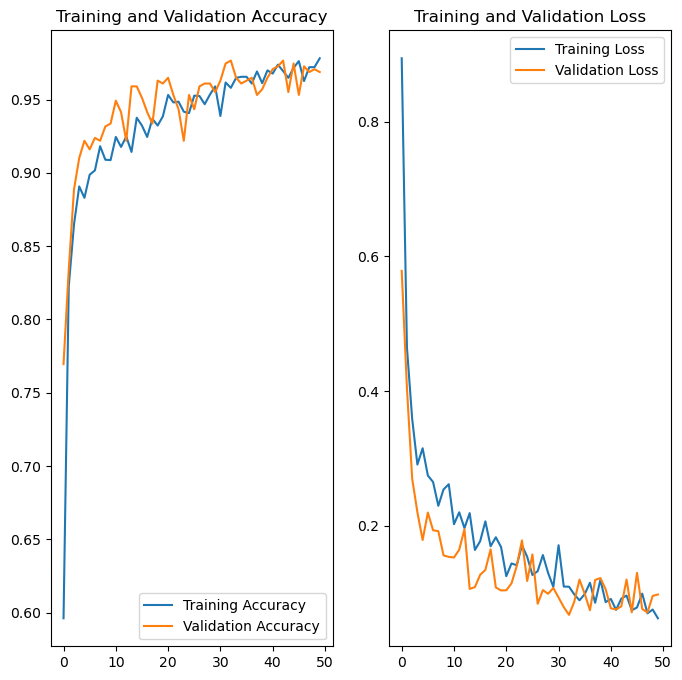

In [30]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Septoria
1/1 [==============================] - 0s 370ms/step
predicted label: Septoria


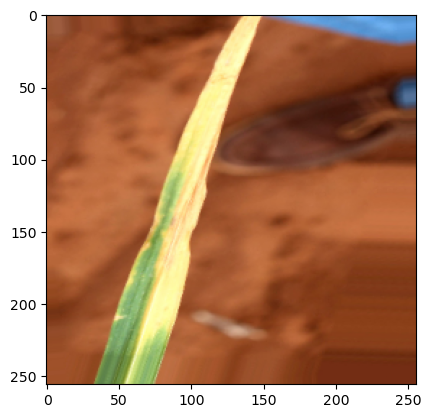

In [31]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 30ms/step


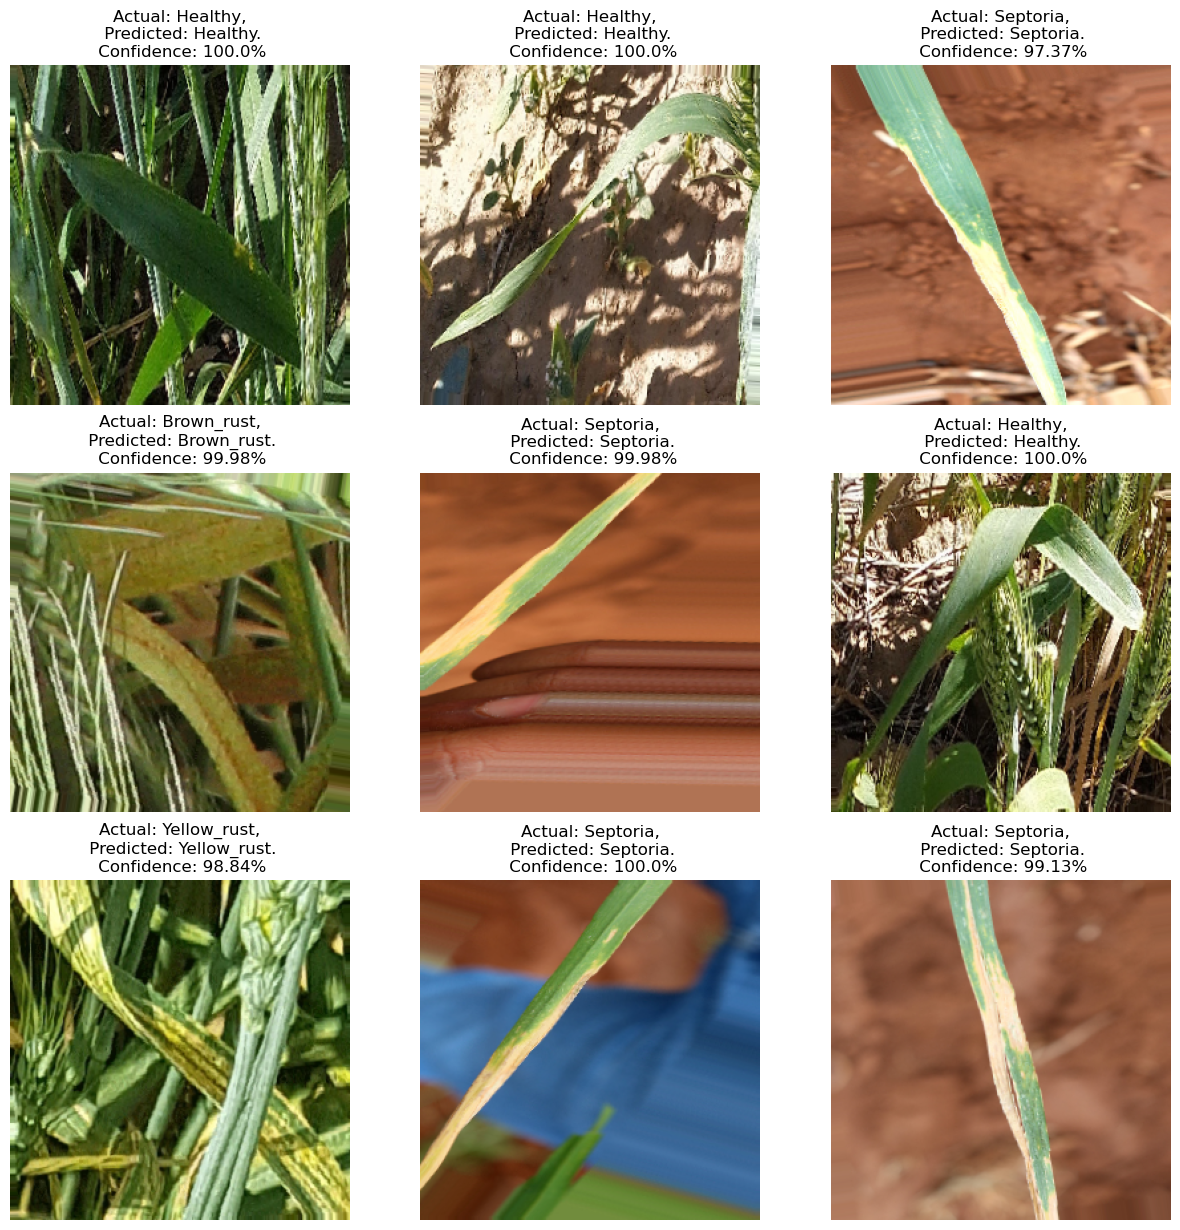

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [34]:
model.save("./model_v4.h5")